# Mini-project 2 – Numerical Methods for PDEs

**Universidad EAFIT – Semester 2025-1**  
**Professor:** José Hernán Ortiz Ocampo  

---

## Problem: Solution of Laplace’s Equation

### Objective
Solve Laplace’s equation to compute the electric potential in a parallel-plate capacitor system.

### Statement
Solve Laplace’s equation:

$$
\nabla^2 V = 0 \tag{1}
$$

to calculate the electric potential in the domain described by the following physical system.

---

### System Description
We consider a parallel-plate capacitor of length $l = 4$ located at:

- **Plate 1:** $y = 2$ with potential $V_{p1}$
- **Plate 2:** $y = 4$ with potential $V_{p2}$

The domain of the problem is defined as:

$$
\Omega = [0, 8] \times [0, 6] \tag{2}
$$

---

### Boundary Conditions

1. **Dirichlet boundary conditions on the domain boundary:**

$$
V(x, y) = 0, \quad \forall (x, y) \in \partial \Omega \tag{3}
$$

2. **Internal conditions for the known plate potentials:**

$$
V(x, 2) = V_{p1}, \quad \forall x \in [2, 6] \tag{4}
$$

$$
V(x, 4) = V_{p2}, \quad \forall x \in [2, 6] \tag{5}
$$



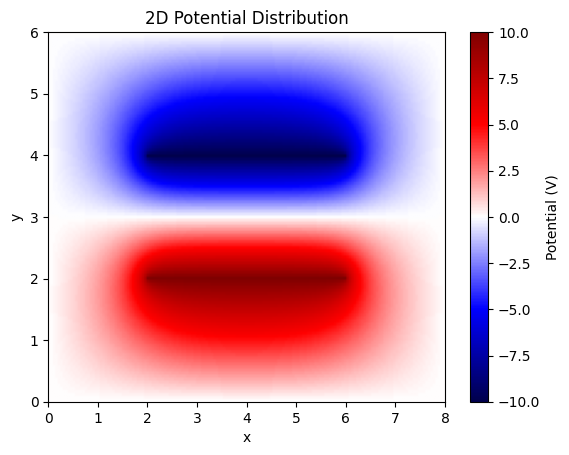

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from utilities2 import boundary_conditions, plot_solution


# Domain parameters
X = 8
Y = 6

# Boundary conditions
Vp1 = 10
Vp2 = -10

h = 0.05 # Grid spacing
n_x_nodes = int(X / h) + 1 # Number of nodes in x direction
n_y_nodes = int(Y / h) + 1 # Number of nodes in y direction
N = n_x_nodes - 1 # Number of elements in x direction
M = n_y_nodes - 1 # Number of elements in y direction

array_size = n_x_nodes*n_y_nodes # Size of the system

A = np.zeros((array_size, array_size)) # Coefficient matrix

for p in range(1, array_size-1): # Loop over all internal nodes
    A[p, p+1] = 1
    A[p, p-1] = 1
    A[p, p] = -4
    if p-(N+1) > 0: # Avoid out-of-bounds access (negative index)
        A[p, p-(N+1)] = 1
    if p+(N+1) < array_size: # Avoid out-of-bounds access (index too large)
        A[p, p+(N+1)] = 1

b = np.zeros(array_size) # Right-hand side vector

for i in range(n_x_nodes): # Apply boundary conditions on the top and bottom
    p_b = i
    p_t = i + M * (N + 1)
    u = 0
    A, b = boundary_conditions(p_b, u, A, b)
    A, b = boundary_conditions(p_t, u, A, b)

for j in range(n_y_nodes): # Apply boundary conditions on the left and right
    p_l = j * (N + 1)
    p_r = N + j * (N + 1)
    u = 0
    A, b = boundary_conditions(p_l, u, A, b)
    A, b = boundary_conditions(p_r, u, A, b)

# Apply boundary conditions on the plates
y_plate1 = int(2/h)
y_plate2 = int(4/h)

for i in range(int(2/h), int(6/h) + 1):
    p1 = i + y_plate1 * (N+ 1)
    u1 = Vp1
    p2 = i + y_plate2 * (N+ 1)
    u2 = Vp2
    A, b = boundary_conditions(p1, u1, A, b)
    A, b = boundary_conditions(p2, u2, A, b)

# Solve the system of equations
V = np.linalg.solve(A,b)

# Plot the solution 
plot_solution(V , n_x_nodes, n_y_nodes, X, Y)